In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv

--2020-11-26 08:19:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-11-26 08:19:38 (1.80 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
Fuel_consump_df = pd.read_csv("FuelConsumption.csv")
Fuel_consump_df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
Fuel_consump_df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
Fuel_consump_explore_df = Fuel_consump_df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
Fuel_consump_explore_df.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


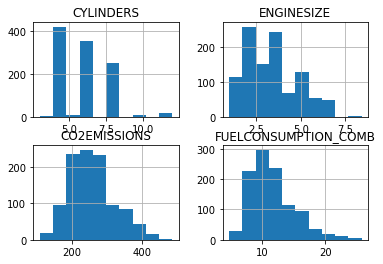

In [7]:
Fuel_plot = Fuel_consump_explore_df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
Fuel_plot.hist()
plt.show()

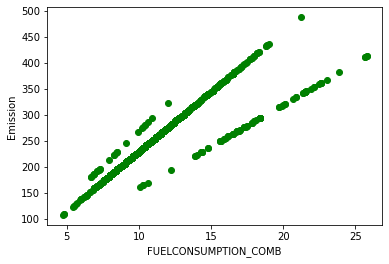

In [12]:
plt.scatter(Fuel_consump_explore_df.FUELCONSUMPTION_COMB, Fuel_consump_explore_df.CO2EMISSIONS,  color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

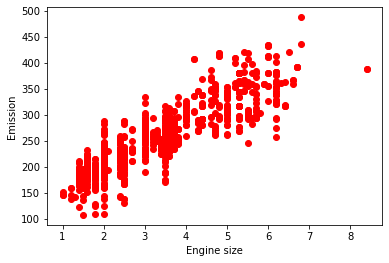

In [11]:
plt.scatter(Fuel_consump_explore_df.ENGINESIZE, Fuel_consump_explore_df.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

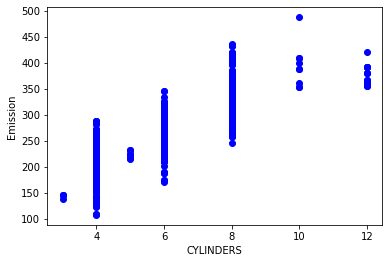

In [18]:
plt.scatter(Fuel_consump_explore_df.CYLINDERS, Fuel_consump_explore_df.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

In [16]:
Data_Mask = np.random.rand(len(Fuel_consump_df)) < 0.8
train = Fuel_consump_explore_df[Data_Mask]
test = Fuel_consump_explore_df[~Data_Mask]

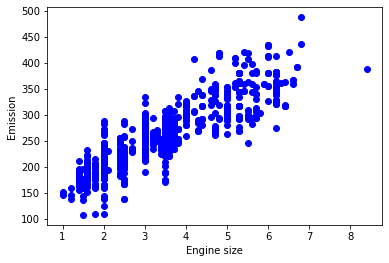

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [19]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regression.coef_)
print ('Intercept: ',regression.intercept_)

Coefficients:  [[39.64454989]]
Intercept:  [124.13396295]


Text(0, 0.5, 'Emission')

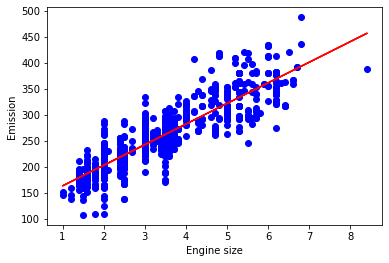

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [21]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regression.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 24.21
Residual sum of squares (MSE): 1004.47
R2-score: 0.68
